## Number/Digits Reader Model
**A simple practice to build a deep neural network to recognize numbers range from 0 to 9.**

The tutorial I followed for this practice is from [sentdex](https://www.youtube.com/watch?v=wQ8BIBpya2k). 

### Import the dataset 
* We use the Tensorflow classic number recgonation dataset [mnist](https://www.tensorflow.org/datasets/catalog/mnist). 
* The dataset contains images of hand-written digits from 0 to 9. 
* There are 60,000 examples for training, 10,000 examples for testing.

In [1]:
# import tensorflow and check the version
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# import mnist dataset
mnist = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Check the image

* We first print out the first image in the dataset. 

In [3]:
import matplotlib.pyplot as plt

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

What we get here is a multi dimensional arrary. We can see the numbers range from 0 to 253, we will perform normalization later on. 

* We can use matplotlib to plot the first image. 

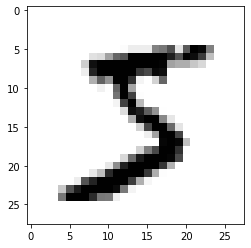

In [4]:
plt.imshow(x_train[0], cmap=plt.cm.binary) # use cmap binary to show a black and white image. the image itself is not colored
plt.show()

### Normalization 
Normalization converts the data to a range of 0 to 1. Dataset without normalization could potentially confuse deep learning models, hense it could yield a bad result. 

In [5]:
# normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Now, we can see all the numbers range from 0 to 1 after normalization. 

### Build the model 
* We use the Sequential model which indicates a linear stack of layers.
* Flatten is used to transform the 28x28 matrix of image into a flat vector.
* We create a 2-hidden layer modle use relu function.
* For the output layer, we have 10 classifications indicating number from 0 to 9 and softmax as the activation function. 

In [22]:
# build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


### Compile the model
* We use Adam as the optimizer, it has relatively low memory requirements and easy to implement. 
* For loss function, we use sparse_categorical_crossentropy since this is a multi class question. 
* For metrics, we use accuracy. 

In [23]:
# parameters to train the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [ ]:
### Train the model 
We use epochs=3. An epoch is a single pass throuhg the full training set in deep learning.   

In [24]:
# train the model
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 19s 315us/sample - loss: 0.2577 - accuracy: 0.9244
Epoch 2/3
60000/60000 [==============================] - 17s 287us/sample - loss: 0.1029 - accuracy: 0.9682
Epoch 3/3
60000/60000 [==============================] - 17s 286us/sample - loss: 0.0701 - accuracy: 0.9778


Acuuracy of 0.9778 is a good score, but we have to pay attention to the problem overfitting. To see if the model is overfitted, we apply validation method. 

### Validation

In [11]:
# calculate validation 
val_loss, val_acc = model.evaluate(x_test, y_test)
val_loss, val_acc

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(0.10698412294648588, 0.9677)

Loss of 0.10698 and accuracy of 0.9677 is good for our practice purpose. 

### Save and recall the model 
We can save the well trained model under a personalized name and recall the model when we need to use it for prediction.

In [13]:
# save the model
model.save('number_reader_model')

INFO:tensorflow:Assets written to: number_reader_model/assets


In [14]:
# recall the model
new_model = tf.keras.models.load_model('number_reader_model')

### Make a prediction

In [15]:
# Use the testing set to make predictions
predictions = new_model.predict([x_test])

In [27]:
print(predictions[0])

[9.2967669e-09 6.7156645e-09 3.4033987e-05 5.5578512e-05 1.3345413e-09
 1.4496024e-07 8.0664045e-14 9.9990690e-01 2.4419389e-06 9.2124509e-07]


If we just print out the prediciton, it is an array of probability distribution. We can use numpy argmax to see the number that was predicted by our model.

In [20]:
import numpy as np

print(np.argmax(predictions[0]))

7


Let's also use matplotlib to show the first image of the testing set, see if it is number 7. 

<function matplotlib.pyplot.show(*args, **kw)>

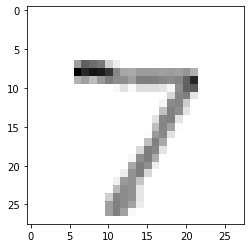

In [28]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show

It is 7! This is the end of this practice. 